## Cognitive Services CV demo

This notebook is based on Cognitive Services examples from azure docs

* https://docs.microsoft.com/en-us/azure/cognitive-services/
* https://docs.microsoft.com/en-us/azure/cognitive-services/computer-vision/

Before running this notebook, set up a cognitive services resource and set the `COGNITIVE_SUBSCRIPTION_KEY` and `COGNITIVE_ENDPOINT` env variables from the resource

In [18]:
! pip install --upgrade azure-cognitiveservices-vision-computervision pillow matplotlib &> /dev/null

In [19]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time


In [20]:
# Get these from the cognitive services resource
subscription_key = os.environ['COGNITIVE_SUBSCRIPTION_KEY'] 
endpoint = os.environ['COGNITIVE_ENDPOINT']

computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

In [21]:
! wget https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/objects.jpg https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg &> /dev/null

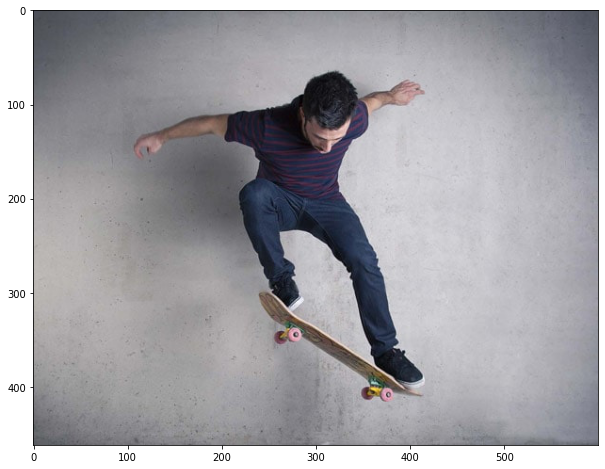

In [22]:
%matplotlib inline
#image_path = "./landmark.jpg"
image_path = "./objects.jpg"

# Call API
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(15,8))
plt.imshow(img)
plt.grid(False)
plt.show()

In [23]:
'''
Describe an Image - remote
This example describes the contents of an image with the confidence score.
'''
print("===== Describe an image - remote =====")

with open(image_path, 'rb') as img:
    description_results = computervision_client.describe_image_in_stream(img)

    # Get the captions (descriptions) from the response, with confidence level
    print("Description of remote image: ")
    if (len(description_results.captions) == 0):
        print("No description detected.")
    else:
        for caption in description_results.captions:
            print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))

===== Describe an image - remote =====
Description of remote image: 
'a man riding a skateboard' with confidence 58.32%


In [24]:

with open(image_path, 'rb') as img:
    '''
    Categorize an Image - remote
    This example extracts (general) categories from a remote image with a confidence score.
    '''
    print("===== Categorize an image - remote =====")
    # Select the visual feature(s) you want.
    remote_image_features = ["categories"]
    # Call API with URL and features
    categorize_results_remote = computervision_client.analyze_image_in_stream(img , remote_image_features)

    # Print results with confidence score
    print("Categories from remote image: ")
    if (len(categorize_results_remote.categories) == 0):
        print("No categories detected.")
    else:
        for category in categorize_results_remote.categories:
            print("'{}' with confidence {:.2f}%".format(category.name, category.score * 100))

===== Categorize an image - remote =====
Categories from remote image: 
'others_' with confidence 0.78%
'outdoor_' with confidence 0.78%


===== Detect Objects - remote =====
Detecting objects in remote image:


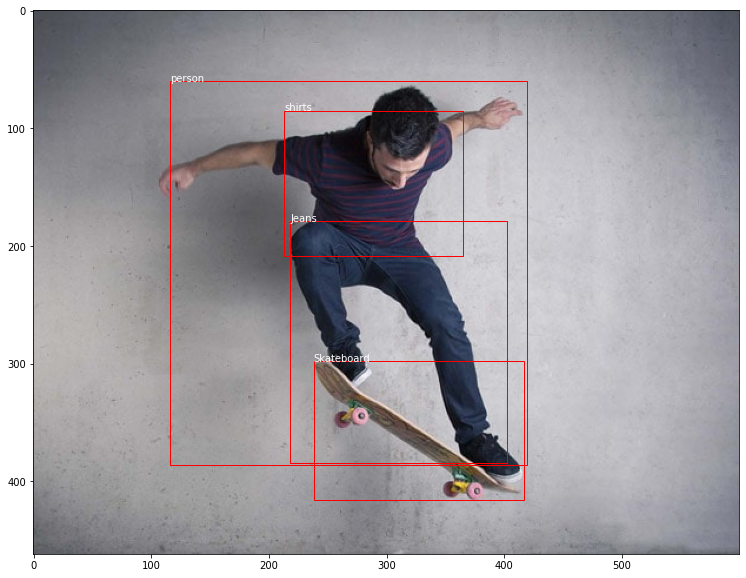

In [25]:
from matplotlib.patches import Rectangle
fig = plt.figure(figsize=(20,10))
with open(image_path, 'rb') as img:
    '''
    Detect Objects - remote
    This example detects different kinds of objects with bounding boxes in a remote image.
    '''
    print("===== Detect Objects - remote =====")
    # Call API with URL
    detect_objects_results_remote = computervision_client.detect_objects_in_stream(img)

    # Print detected objects results with bounding boxes
    print("Detecting objects in remote image:")
    if len(detect_objects_results_remote.objects) == 0:
        print("No objects detected.")
    else:
        img = mpimg.imread(image_path)
        plt.imshow(img)
        for object in detect_objects_results_remote.objects:
            plt.text(object.rectangle.x, object.rectangle.y, object.object_property, c='white')
            plt.gca().add_patch(Rectangle((object.rectangle.x,object.rectangle.y),object.rectangle.w,object.rectangle.h,linewidth=1,edgecolor='r',facecolor='none'))

plt.show()
